# Linear regression (1D)

**Hypothesis:**

$$h_0(x) = \theta_1x+\theta_0$$

### Cost function is Mean Squared Error (MSE):

$$J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m}(h_0(x^{(i)}) - y^{(i)})^2 = \frac{1}{2m} \sum_{i=1}^{m}(\theta_1x^{(i)}+\theta_0 - y^{(i)})^2$$

### Gradient descent

$$ \theta_j = \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1), j \in {0, 1} $$

$$\frac{\partial}{\partial\theta_0}J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^{m}(h_0(x^{(i)}) - y^{(i)})$$

$$\frac{\partial}{\partial\theta_1}J(\theta_0, \theta_1) = \frac{1}{m}\sum_{i=1}^{m}(h_0(x^{(i)}) - y^{(i)})x^{(i)}$$

$$\alpha = const$$

In [3]:
import numpy
import random
import matplotlib.pyplot as plt
# FFS please raise an exception instead of giving infinity on overflows
numpy.seterr('raise')

N_DATA_SAMPLES = 100
NOISE_SIZE = 5
X_MIN = -10
X_MAX = 10

A = 2
B = 5

NOISE = numpy.random.uniform(-NOISE_SIZE/2, NOISE_SIZE/2, N_DATA_SAMPLES)

# Generate "dataset" with noise 
X = numpy.random.uniform(low=X_MIN, high=X_MAX, size=(N_DATA_SAMPLES,))
Y = A * X + B + NOISE 

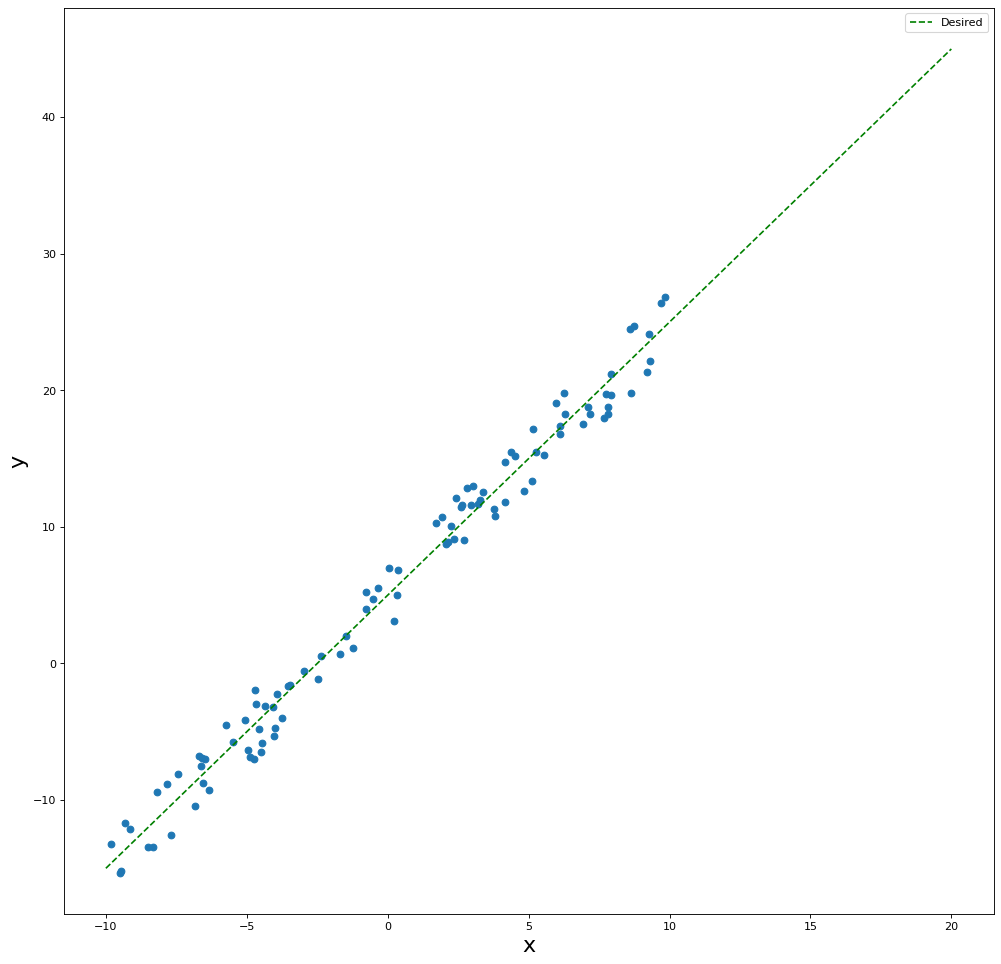

In [4]:
# building input data distribution along with desired linear function plot
def get_data_plot(x, y, desired_t_1, desired_t_0):
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(X, Y)
    desired_x = numpy.linspace(X_MIN, X_MAX * 2, 2)
    desired_line = plt.plot(desired_x, desired_x * desired_t_1 + desired_t_0, 'g--')[0]
    desired_line.set_label('Desired')
    plt.xlabel('x', fontsize=20)
    plt.ylabel('y', fontsize=20)
    plt.legend()
    return plt


get_data_plot(X, Y, A, B).show()

In [5]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.t_0 = 0
        self.t_1 = 0
    
    def fit(self, x, y):
        """Gradient descent for linear regression implementation"""
        t_0 = self.t_0  # Save variables to improve formula readability
        t_1 = self.t_1
        a = self.learning_rate
        m = x.shape[0]
        for _ in range(self.epochs):
            t_0_temp = t_0 - a / m * numpy.sum(t_1 * x + t_0 - y)
            t_1_temp = t_1 - a / m * numpy.sum((t_1 * x + t_0 - y) * x)
            t_0 = t_0_temp
            t_1 = t_1_temp
        # final values
        self.t_0 = t_0
        self.t_1 = t_1

    
    def predict(self, x):
        return self.t_1 * x + self.t_0

In [6]:
# testing
# from sklearn.linear_model import LinearRegression
l = LinearRegression(learning_rate=0.0001, epochs=100000)
l.fit(X, Y)
print(f'Predicted coefficients are \u03B8\u2081={l.t_1:.2f}, \u03B8\u2080={l.t_0:.2f}')
print(f'Real coefficients are \u03B8\u2081={A}, \u03B8\u2080={B}')
print(f'Prediction for 100 is {l.predict(100):.2f}')

Predicted coefficients are θ₁=2.00, θ₀=5.03
Real coefficients are θ₁=2, θ₀=5
Prediction for 100 is 205.12


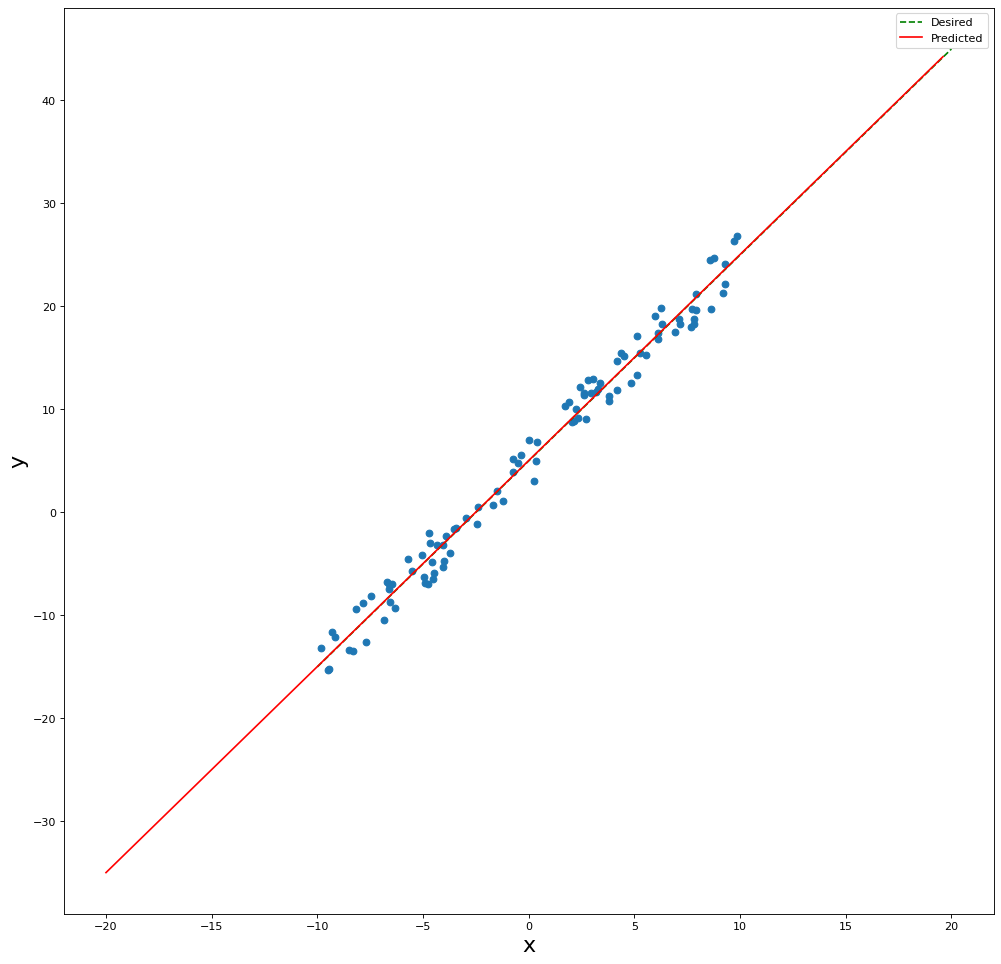

In [7]:
plt = get_data_plot(X, Y, A, B)
observed_x = numpy.arange(X_MIN*2, X_MAX*2, 2*(X_MAX-X_MIN)/N_DATA_SAMPLES)
observed_line = plt.plot(observed_x, observed_x * l.t_1 + l.t_0, 'r')[0]
observed_line.set_label('Predicted')
plt.legend()
plt.show()

# Logistic regression (2D)

In [8]:
import numpy as np
from numpy.random import multivariate_normal, rand
import matplotlib.pyplot as plt

In [9]:
def generate_data(mean_1=(0, 0), mean_2=(30, 30), cov_1=((400, 0), (0, 40)), cov_2=((30, 0), (0, 30)), dots=1000):
    c1 = multivariate_normal(mean_1, cov_1, dots)
    c2 = multivariate_normal(mean_2, cov_2, dots)
    
    X = np.concatenate((c1, c2), axis=0)
    Y = np.concatenate((np.array([0] * dots), np.array([1] * dots)))
    return X, Y


X, Y = generate_data()

In [10]:
def split_dataset(X, Y, percent=0.3):
    indices = np.random.permutation(X.shape[0])
    train_size = int(X.shape[0] * (1 - percent))
    training_idx, test_idx = indices[:train_size], indices[train_size:]
    return X[training_idx,:], X[test_idx,:], Y[training_idx], Y[test_idx]

X_1, X_2, Y_1, Y_2 = split_dataset(X, Y)

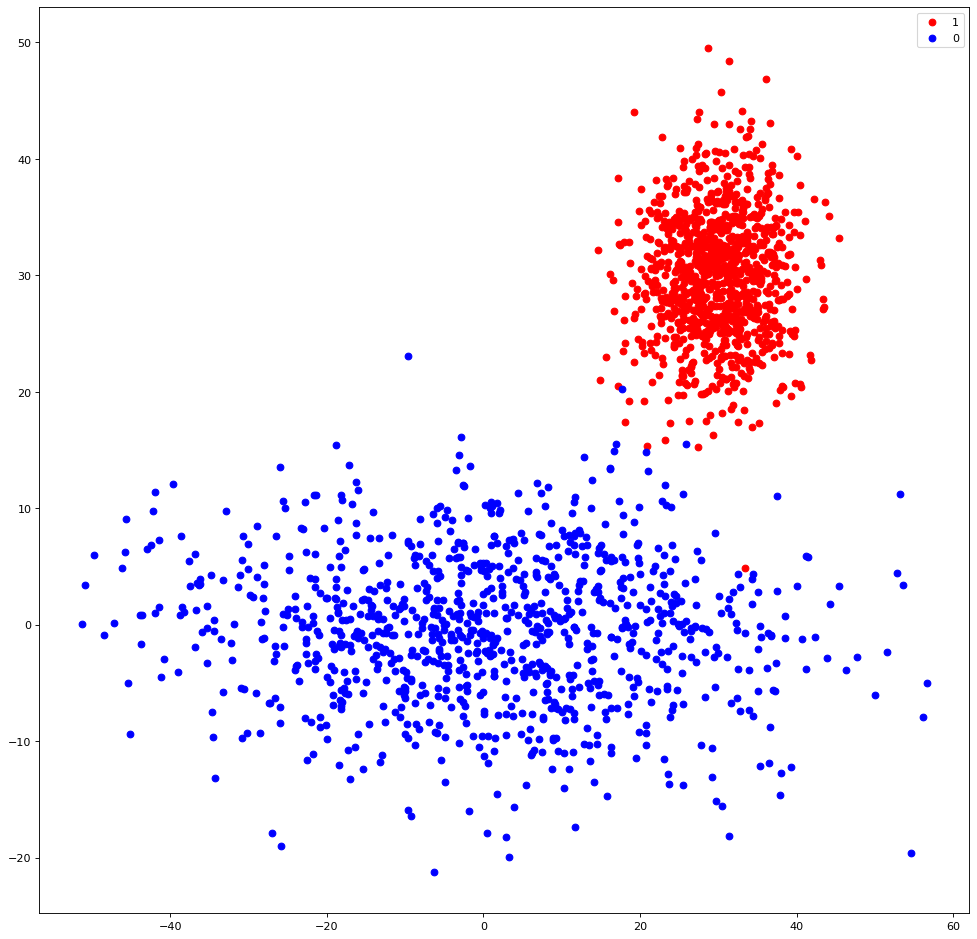

In [11]:
def build_plot(X_0, Y_0, X_1, Y_1):
    plt.figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')
    plt.scatter(X_1, Y_1, color='r', label='1')
    plt.scatter(X_0, Y_0, color='b', label='0')
    plt.legend()
    plt.show()

    
build_plot(X[:1000, 0], X[:1000, 1], X[1000:,0], X[1000:,1])

In [12]:
class LogisticReg:
    
    def __init__(self, lr=0.01, max_iter=1000):
        self.lr = lr
        self.epochs = max_iter
    
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.e**(-z))

    def fit(self, X, Y):
        X = np.c_[X, np.ones(X.shape[0])]    
        weights = rand(X.shape[1])
        N = len(X)
                 
        for _ in range(self.epochs):        
            Y_pred = self.sigmoid(np.dot(X, weights))
            weights -= self.lr * np.dot(X.T,  Y_pred - Y) / N
            
        self.weights = weights
    
    def predict(self, X):
        X = np.c_[X, np.ones(X.shape[0])] 
        z = np.dot(X, self.weights)
        return [1 if i > 0.5 else 0 for i in self.sigmoid(z)]

In [13]:
log_reg = LogisticReg()
log_reg.fit(X_1, Y_1)
Y_predicted = log_reg.predict(X_2)
print('Accuracy: ',np.mean(Y_predicted==Y_2))

Accuracy:  0.9616666666666667


# CART (2D)

In [14]:
import numpy as np

In [63]:
class Node:
    def __init__(self, gini, num_samples, num_samples_per_class, predicted_class):
        self.gini = gini
        self.num_samples = num_samples
        self.num_samples_per_class = num_samples_per_class
        self.predicted_class = predicted_class
        self.feature_index = None
        self.threshold = 0
        self.left = None
        self.right = None
    
    def show_tree(self, depth, cond):
        base = '    ' * depth + cond
        if self.feature_index != None:
            print(base + 'if X[' + str(self.feature_index) + '] <= ' + str(self.threshold))
            if self.left is not None:
                self.left.show_tree(depth+1, 'then ')
            if self.right is not None:
                self.right.show_tree(depth+1, 'else ')
        else:
            print(base + '{value: ' + str(self.predicted_class) + ', samples: ' + str(self.num_samples) + '}')
    
    def __repr__(self):
        return f'<Node gini={self.gini} feature_index={self.feature_index} predicted_class={self.predicted_class} num_samples={self.num_samples}>'


class CART:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def print_tree(self):
        self.tree_.show_tree(0, ' ')

    def _gini(self, y):
        m = y.size
        return 1.0 - sum((np.sum(y == c) / m) ** 2 for c in range(self.n_classes_))

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                # The Gini impurity of a split is the weighted average of the Gini
                # impurity of the children.
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(
            gini=self._gini(y),
            num_samples=y.size,
            num_samples_per_class=num_samples_per_class,
            predicted_class=predicted_class,
        )

        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        """Predict class for a single sample."""
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class
    
    def _show_tree(self, depth, cond):
        base = '    ' * depth + cond
        if self.feature != None:
            print(base + 'if X[' + str(self.tree_.l) + '] <= ' + str(self.threshold))
            self.left._show_tree(depth+1, 'then ')
            self.right._show_tree(depth+1, 'else ')
        else:
            print(base + '{value: ' + str(self.label) + ', samples: ' + str(self.n_samples) + '}')


In [69]:
clf = CART(max_depth=3)
clf.fit(X_1, Y_1)
Y_pred = clf.predict(X_2)
print('Accuracy: ',np.mean(Y_pred==Y_2))

Accuracy:  0.9966666666666667


In [70]:
clf.print_tree()

 if X[1] <= 15.135404932936945
    then if X[0] <= 33.08600917734134
        then {value: 0, samples: 675}
        else if X[0] <= 33.67433597894137
            then {value: 1, samples: 1}
            else {value: 0, samples: 37}
    else if X[0] <= 5.865163359704029
        then {value: 0, samples: 1}
        else if X[1] <= 15.65902599471844
            then {value: 0, samples: 2}
            else {value: 1, samples: 684}
